# Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ssn
ssn.set()
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
# load the dataset
tweet_data=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
tweet_data.drop(['Unnamed: 0'],inplace=True,axis=1)
tweet_data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


## Text Preprocessing

In [ ]:
tweet_data=[Text.strip() for Text in tweet_data.Text] # remove both the leading and the trailing characters
tweet_data=[Text for Text in tweet_data if Text] # removes empty strings, because they are considered in Python as False
tweet_data[0:8]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)']

In [ ]:
# Joining the list into one string/text
texts=' '.join(tweet_data)
texts[0:1000]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tokens=tknzr.tokenize(texts)
tokens=str(tokens)

print(tokens[0:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-le


In [ ]:
# Remove Punctuations 
#no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))

for c in string.punctuation:
    tokens= tokens.replace(c,"")

In [ ]:
# remove https or url within text
import re
wo_links=re.sub(r'http\S+', '', tokens)
wo_links=wo_links.lower()
wo_links[0:1000]

'i x92 m an alien ray tracing on cyberpunk with hdr is nextlevel  have you tried it  great interview  doge is underestimated congratulations tesla china for amazing execution last year  now on to the next for even more   happy new year of the ox   frodo was the underdoge  all thought he would fail  himself most of all   haha thanks  indeed  tweets definitely do not represent realworld time allocation  the most entertaining outcome is the most likely just sent some just agree to do clubhouse with  it x92 s getting real bought some dogecoin for lil x  so he can be a toddler hodler he definitely has issues  but the sentencing seems a bit high thanks for fixing please unlock my account u0001f923 u0001f923 this is true power haha  any crypto wallet that won x92 t give you your private keys should be avoided at all costs your app sucks rt  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission   yes once we can predict cash flow reasonabl

In [ ]:
wo_n = re.sub("[0-9" "]+"," ",wo_links).lower() #removing numbers
wo_s = re.sub("[^A-Za-z" "]+"," ",wo_n).lower() #removing special characters

In [ ]:
# Tokenization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
ft = word_tokenize(wo_s)

In [ ]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission']


In [ ]:
#removing stopwords
without_sw = [word for word in ft if word not in stopwords.words('english')]

In [ ]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
lem=nlp(' '.join(without_sw))
print(lem)

In [ ]:
simple_words=[token.lemma_ for token in lem]
simple_words[0:100]

['x',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'try',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'thought',
 'would',
 'fail',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertain',
 'outcome',
 'likely',
 'send',
 'agree',
 'clubhouse',
 'x',
 'get',
 'real',
 'buy',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'please',
 'unlock',
 'account',
 'u',
 'f',
 'u',
 'f',
 'true',
 'power',
 'haha',
 'crypto',
 'wallet',
 'x',
 'give',
 'private',
 'key',
 'avoid',
 'cost',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gateway',
 'together',
 'one',
 'mission',
 'yes',
 'predi

In [ ]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[0:200])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flo

In [ ]:
#converting into vectors using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
tf = CountVectorizer()
vectors = tf.fit_transform(simple_words)

In [ ]:
print(tf.vocabulary_)

In [ ]:
#now using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer()
vectors1 = td.fit_transform(simple_words)

In [ ]:
feature_names = tf.get_feature_names()
dense = vectors1.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab,aber,able,abo,aboard,abort,absence,absolute,absolutely,absorb,...,yolt,york,young,yup,zealand,zenit,zero,zip,zon,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
w_list = ' '.join(df)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',
                      width=2000,
                      height=1600).generate(w_list)

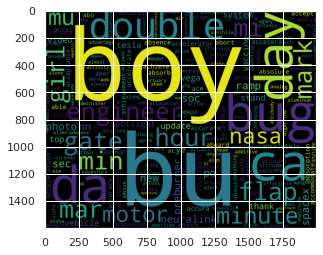

In [ ]:
plt.imshow(wordcloud)

In [ ]:
for i in lem[0:10]:
    print(i, i.pos_)

x X
alien PROPN
ray PROPN
tracing VERB
cyberpunk PROPN
hdr PROPN
nextlevel PROPN
tried VERB
great ADJ
interview NOUN


In [ ]:
#Filtering for nouns and verbs 
nouns_verbs = [token.text for token in lem if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

In [ ]:
#Counting tokens again
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0).tolist()[0]
words_freq = [(word, sum_words[idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,launch,44
1,would,41
2,make,33
3,people,32
4,need,31
5,year,29
6,production,29
7,coming,25
8,could,24
9,work,23


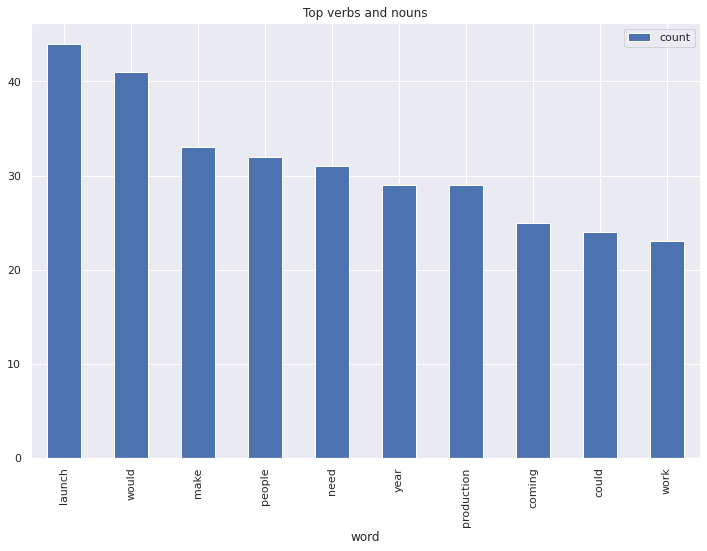

In [ ]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns');

Sentiment Analysis



In [ ]:
import pandas as pd
from textblob import TextBlob
import re

In [ ]:
def get_cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)#removes username
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)# removes hyperlink
    text=  re.sub("[^A-Za-z" "]+"," ",text) #removes special characters
    return text

In [ ]:
tweet_data = pd.DataFrame(tweet_data,columns=['text'])
tweet_data.head()

,text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [ ]:
tweet_data['clean_text'] = tweet_data['text'].apply(get_cleanText)

In [ ]:
tweet_data['clean_text'][0:100]

0                                          I m an alien
1      AA Carmack Ray tracing on Cyberpunk with HDR ...
2                                      Great interview 
3                                Doge is underestimated
4      Congratulations Tesla China for amazing execu...
                            ...                        
95                                                 Doge
96                                                     
97                                   High seas amp wind
98                                This was a tough one 
99           Watch Falcon launch Starlink satellites U 
Name: clean_text, Length: 100, dtype: object

In [ ]:
#function to get subjectivity
def get_Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
#function to get polarity(positive or negative)
def get_Polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
tweet_data['Subjectivity'] = tweet_data['clean_text'].apply(get_Subjectivity)
tweet_data['Polarity'] = tweet_data['clean_text'].apply(get_Polarity)

In [ ]:
tweet_data[0:5]

,text,clean_text,Subjectivity,Polarity
0,@kunalb11 Im an alien,I m an alien,0.750000,-0.250
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,AA Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000
2,@joerogan @Spotify Great interview!,Great interview,0.750000,0.800
3,@gtera27 Doge is underestimated,Doge is underestimated,0.000000,0.000
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,0.366667,0.275


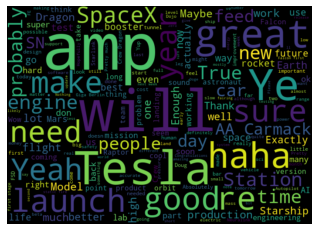

In [ ]:
#plotting the tweet
allwords = ' '.join([word for word in tweet_data['clean_text']])
wc = WordCloud(width=700,height=500,random_state=4,max_font_size=150).generate(allwords)

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show();

In [ ]:
#function to compute whether a tweet is positive or negative
def get_score(score):
    score = float(score)
    if (score < 0):
        return 'Negative'
    elif (score == 0):
        return 'Neutral'
    elif score > 0:
        return 'Positive'

In [ ]:
tweet_data['Sentiment']= tweet_data['Polarity'].apply(get_score)
tweet_data[0:10]

,text,clean_text,Subjectivity,Polarity,Sentiment
0,@kunalb11 Im an alien,I m an alien,0.750000,-0.250000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,AA Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,@joerogan @Spotify Great interview!,Great interview,0.750000,0.800000,Positive
3,@gtera27 Doge is underestimated,Doge is underestimated,0.000000,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,0.366667,0.275000,Positive
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox,0.727273,0.468182,Positive
6,"Frodo was the underdoge,\nAll thought he would...",Frodo was the underdoge All thought he would f...,0.400000,0.000000,Neutral
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks,0.250000,0.200000,Positive
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed Tweets definitely do not represent rea...,0.400000,0.100000,Positive
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely,0.675000,0.375000,Positive


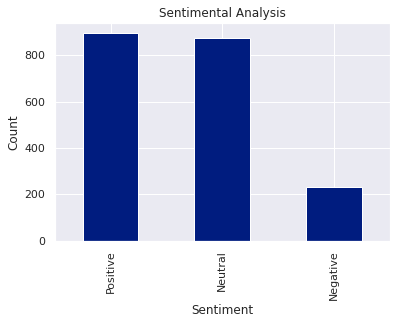

In [ ]:
plt.title("Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.style.use('seaborn-dark-palette')
tweet_data['Sentiment'].value_counts().plot(kind='bar');

In [ ]:
#all positive tweets
positive=tweet_data[tweet_data['Polarity']>0]
positive['text']

2                     @joerogan @Spotify Great interview!
4       @teslacn Congratulations Tesla China for amazi...
5       Happy New Year of the Ox! https://t.co/9WFKMYu2oj
7          @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8       @flcnhvy @anonyx10 Indeed! Tweets definitely d...
                              ...                        
1986                   Best use of the term Full Stack?
1987    @PPathole @IheartTesla For sure. This is both ...
1991    @IheartTesla No easy way to answer this in a t...
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
Name: text, Length: 894, dtype: object

In [ ]:
#all negative tweets
negatives=tweet_data[tweet_data['Polarity']<0]
negatives['text']

0                                  @kunalb11 Im an alien
21                          @freewalletorg Your app sucks
25      @RationalEtienne @Adamklotz_ Starlink is a sta...
26      @RationalEtienne @Adamklotz_ SpaceX needs to p...
32      @SRuhle Everyone at Tesla receives stock. \n\n...
                              ...                        
1943    @teslaownersSV @engineers_feed The strength &a...
1949    @katlinegrey Reusability is essential. A rocke...
1958    @jgrano305 @TeslaratiTeam @Teslarati We have r...
1989        @buzzindelhi Sorry, should hopefully be soon!
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
Name: text, Length: 231, dtype: object

In [ ]:
#getting the percentage of positive tweets
ptweets = positive['text']
score = round(ptweets.shape[0]/tweet_data.shape[0] *100)
print("The percentage of positive tweets is {} %.".format(score))

The percentage of positive tweets is 45 %.


In [ ]:
ntweets = negatives['text']
scoren = round(ntweets.shape[0]/tweet_data.shape[0] *100)
print("The percentage of negative tweets is {} %.".format(scoren))

The percentage of negative tweets is 12 %.


In [ ]:
neutral = tweet_data[tweet_data['Polarity']==0]
neutral = neutral['text']
nn = round(neutral.shape[0]/tweet_data.shape[0] *100)
print("The percentage of Neutral tweets is {} %.".format(nn))

The percentage of Neutral tweets is 44 %.
